In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_data = pd.read_csv("advertising.csv")
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Identify null entries

In [3]:
sales_data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualization

##### TV Vs Sales

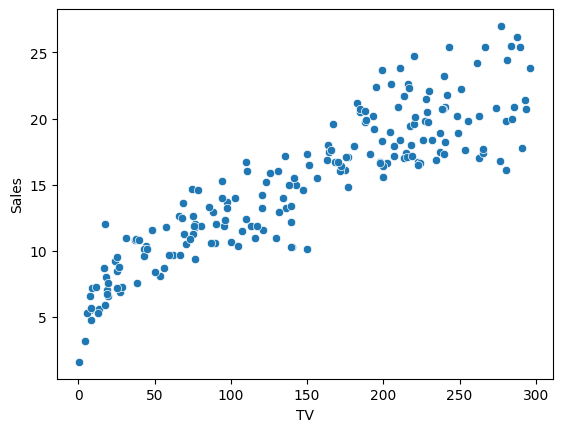

In [7]:
sns.scatterplot(data=sales_data,x="TV",y="Sales")
plt.show()

##### Radio Vs Sales

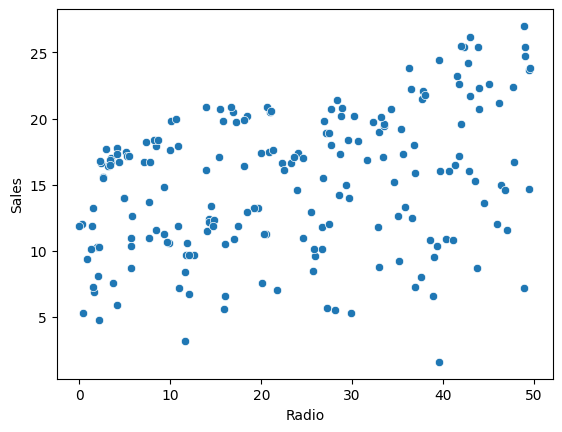

In [8]:
sns.scatterplot(data=sales_data,x="Radio",y="Sales")
plt.show()

##### Newspaper Vs Sales

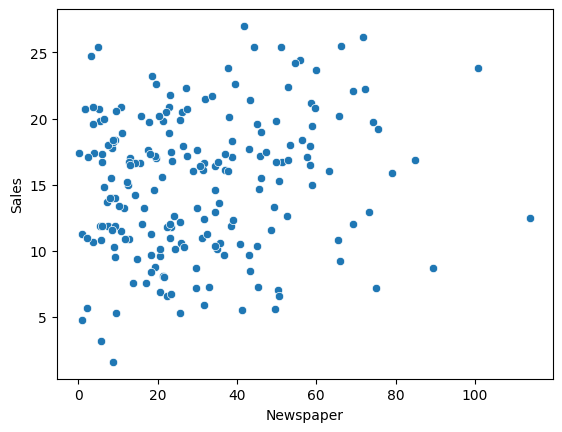

In [9]:
sns.scatterplot(data=sales_data,x="Newspaper",y="Sales")
plt.show()

### Insight:
##### As TV advertising increases Sales also increases followed by Radio advertising rather than newspaper.So companies should invest on TV advertisements then radio advertising.

In [15]:
sales_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### Insight:
##### TV-High correlation
##### Radio - Medium correlation
##### Newspaper - Low correlation


### It is a Regression Problem.
##### Because output Sales are continuous numbers not categories

## Split Data(Train and Test)

In [17]:
from sklearn.model_selection import train_test_split

X = sales_data[["TV","Radio","Newspaper"]]      ## Input
y = sales_data["Sales"]                         ## Output
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


### Build Machine Learning Model
#### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Prediction

In [21]:
y_pred = model.predict(X_test)

#### Model Evaluation

In [23]:
from sklearn.metrics import mean_squared_error,r2_score
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

MSE: 2.9077569102710896
R2 Score: 0.9059011844150826


### R2 Score close to 0.9 - good model

#### Prediction for new data

In [29]:
 import numpy as np
new_data = np.array([[200,30,40]])
X = sales_data[["TV","Radio","Newspaper"]].values     ## Input
y = sales_data["Sales"].values      
model.fit(X_train,y_train)

prediction = model.predict(new_data)
print(prediction)

[18.81780731]


C:\Users\rajas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
import pandas as pd
new_data = pd.DataFrame([[200,30,40]],columns=["TV","Radio","Newspaper"])
prediction = model.predict(new_data)
print(prediction)


[18.81780731]
